#Data Understanding

##Data Loading

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ariansyahfadillah","key":"e253b8a300f6c06d44bbc32fc8a8fe66"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d tedisetiady/leaf-rice-disease-indonesia

 42% 9.00M/21.6M [00:00<00:00, 82.6MB/s]
100% 21.6M/21.6M [00:00<00:00, 148MB/s] 


In [5]:
from tensorflow import keras
import zipfile
import os
import numpy as np
import tensorflow as tf

In [6]:
local_zip = '/content/leaf-rice-disease-indonesia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/leaf-rice-disease-indonesia')
zip_ref.close()

In [7]:
data_dir = '/content/leaf-rice-disease-indonesia'

## Load Data Using a Keras

In [8]:
leafRiceDataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(150, 150)
  )

Found 240 files belonging to 3 classes.


In [9]:
class_names = leafRiceDataset.class_names
print(class_names)

['blast', 'blight', 'tungro']


##Visualize the Data

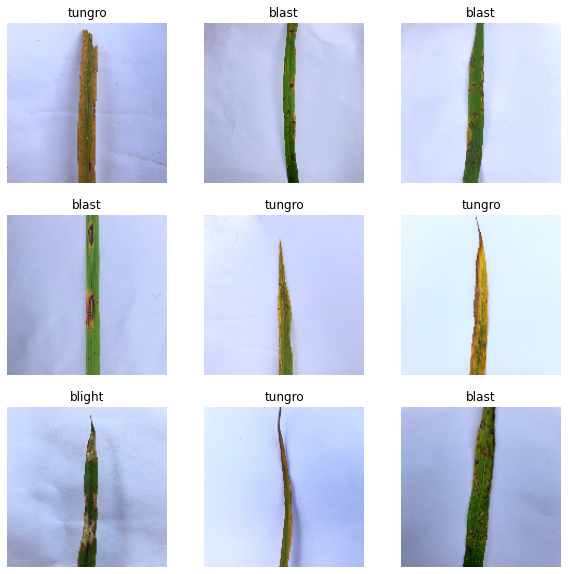

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in leafRiceDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [11]:
#classes = []
#for file in os.listdir(data_dir):
#    classes += [file]
    
#print(classes)

In [12]:
dataset = []
count = 0

for file in os.listdir(data_dir):
    path = os.path.join(data_dir,file)
    t = 0
    for im in os.listdir(path):
        image = tf.keras.preprocessing.image.load_img(
            os.path.join(path,im), 
            grayscale=False, 
            color_mode='rgb', 
            target_size=(150,150))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image = image/255.0
        dataset += [[image,count]]
        t += 1
    count = count+1

In [13]:
data,trainlabels = zip(*dataset)

In [14]:
labels1 = tf.keras.utils.to_categorical(trainlabels)
labels = np.array(labels1)

In [15]:
data = np.array(data)

In [16]:
from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy = train_test_split(data,labels,test_size=0.2,random_state=42)

In [17]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(192, 150, 150, 3)
(48, 150, 150, 3)
(192, 3)
(48, 3)


In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.2)

#Modeling

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation='softmax')

],    name='Conv2D_Model')

model.summary()

Model: "Conv2D_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)      

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#Training Model

In [21]:
history = model.fit(
    datagen.flow(trainx,trainy,batch_size=32),
    epochs=30,
    validation_data=(testx,testy))

Epoch 1/30
6/6 [==============================] - 11s 1s/step - loss: 1.2265 - accuracy: 0.3490 - val_loss: 1.1016 - val_accuracy: 0.4792
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 1.1015 - accuracy: 0.3698 - val_loss: 1.0986 - val_accuracy: 0.3125
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 1.0998 - accuracy: 0.3438 - val_loss: 1.0981 - val_accuracy: 0.3125
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 1.0979 - accuracy: 0.3490 - val_loss: 1.1001 - val_accuracy: 0.3125
Epoch 5/30
6/6 [==============================] - 10s 2s/step - loss: 1.0971 - accuracy: 0.3490 - val_loss: 1.0930 - val_accuracy: 0.3125
Epoch 6/30
6/6 [==============================] - 8s 1s/step - loss: 1.0891 - accuracy: 0.4167 - val_loss: 1.0799 - val_accuracy: 0.3750
Epoch 7/30
6/6 [==============================] - 7s 1s/step - loss: 1.0791 - accuracy: 0.3646 - val_loss: 1.0544 - val_accuracy: 0.5208
Epoch 8/30
6/6 [=======================

#Evaluation Model

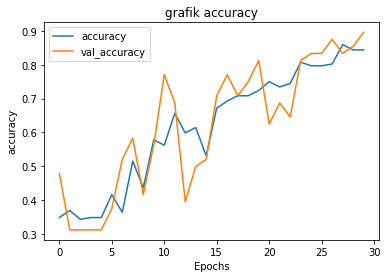

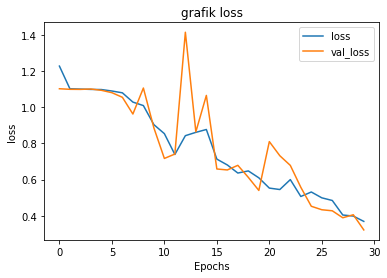

In [22]:
import matplotlib.pyplot as plt
def grafik_plot(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title('grafik '+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
grafik_plot(history, "accuracy")
grafik_plot(history, "loss")

In [23]:
model.evaluate(testx, testy)

2/2 [==============================] - 0s 143ms/step - loss: 0.3227 - accuracy: 0.8958


[0.32265111804008484, 0.8958333134651184]

In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(testx)
pred = np.argmax(y_pred, axis=1)
data = np.argmax(testy, axis=1)
print(classification_report(data, pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       1.00      0.93      0.97        15
           2       0.93      0.82      0.87        17

    accuracy                           0.90        48
   macro avg       0.91      0.90      0.90        48
weighted avg       0.91      0.90      0.90        48



In [25]:
data_path = '/content/leaf-rice-disease-indonesia/blast/IMG_0448.jpg'

img = tf.keras.utils.load_img(
    data_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array/255.0
img_array = np.array(img_array)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to blast with a 47.90 percent confidence.


In [34]:
data_path = '/content/leaf-rice-disease-indonesia/blight/IMG_0936.jpg'

img = tf.keras.utils.load_img(
    data_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array/255.0
img_array = np.array(img_array)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to blight with a 47.42 percent confidence.


In [30]:
data_path = '/content/leaf-rice-disease-indonesia/tungro/IMG_0399.jpg'

img = tf.keras.utils.load_img(
    data_path, target_size=(150, 150)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array/255.0
img_array = np.array(img_array)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to tungro with a 49.00 percent confidence.


Saving tungro.jpg to tungro.jpg
tungro.jpg
2
Tungro


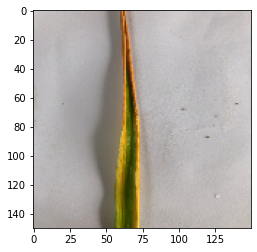

In [45]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x/255.0
  x = np.array(x)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  score = tf.nn.softmax(predictions[0])
  classes = np.argmax(score)
  
  print(pic)
  print(classes)
  
  if classes==0:
    print('Blast')
  elif classes==1:
    print('Blight')
  elif classes==2:
    print('Tungro')

Saving blight.jpg to blight.jpg
blight.jpg
1
Blight


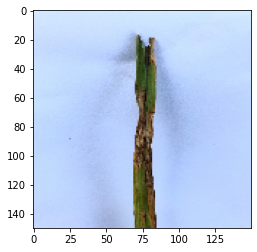

In [47]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x/255.0
  x = np.array(x)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  score = tf.nn.softmax(predictions[0])
  classes = np.argmax(score)
  
  print(pic)
  print(classes)
  
  if classes==0:
    print('Blast')
  elif classes==1:
    print('Blight')
  elif classes==2:
    print('Tungro')

Saving blast.jpg to blast.jpg
blast.jpg
0
Blast


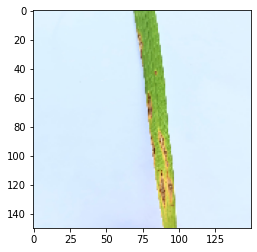

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded_files = files.upload()
 
for pic in uploaded_files.keys():
  path = pic
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x/255.0
  x = np.array(x)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=32)
  score = tf.nn.softmax(predictions[0])
  classes = np.argmax(score)
  
  print(pic)
  print(classes)
  
  if classes==0:
    print('Blast')
  elif classes==1:
    print('Blight')
  elif classes==2:
    print('Tungro')

In [49]:
if __name__ == '__main__':
    model.save("model.h5")